# Import Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

# Get the data and one with the data

In [78]:
import pathlib
import numpy as np
data_dir = pathlib.Path('./rabbit-vs-kitty/train-cat-rabbit/')
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
classes

array(['cat', 'rabbit'], dtype='<U6')

## Reading img data from matplot library

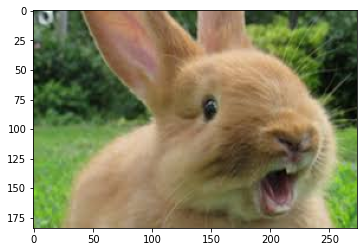

In [14]:
from matplotlib.image import imread

imgtensor = imread('./rabbit-vs-kitty/test-images/rabbit/images-2.jpeg')
plt.imshow(imgtensor)

In [36]:
import os

for depth, parents, files in os.walk('./rabbit-vs-kitty/'):
    print('\n')
    if len(depth) > 0:
        print(f'Depth of dirs {depth}')
    if len(parents) > 0:
        print(f'Dirs {parents}')
    if len(files) > 0:
        print(f'Total files in the dirs {len(files)}')



Depth of dirs ./rabbit-vs-kitty/
Dirs ['train-cat-rabbit', 'val-cat-rabbit', 'test-images']
Total files in the dirs 1


Depth of dirs ./rabbit-vs-kitty/train-cat-rabbit
Dirs ['cat', 'rabbit']


Depth of dirs ./rabbit-vs-kitty/train-cat-rabbit/cat
Total files in the dirs 800


Depth of dirs ./rabbit-vs-kitty/train-cat-rabbit/rabbit
Total files in the dirs 800


Depth of dirs ./rabbit-vs-kitty/val-cat-rabbit
Dirs ['cat', 'rabbit']


Depth of dirs ./rabbit-vs-kitty/val-cat-rabbit/cat
Total files in the dirs 207


Depth of dirs ./rabbit-vs-kitty/val-cat-rabbit/rabbit
Total files in the dirs 207


Depth of dirs ./rabbit-vs-kitty/test-images
Dirs ['cat', 'rabbit']


Depth of dirs ./rabbit-vs-kitty/test-images/cat
Total files in the dirs 10


Depth of dirs ./rabbit-vs-kitty/test-images/rabbit
Total files in the dirs 5


# Create Data Generator

In [336]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen =ImageDataGenerator(rescale=1/255.,rotation_range=20,zoom_range=.1, width_shift_range=.1,shear_range=.2,)
validation_gen =ImageDataGenerator(rescale=1/255., zoom_range=.1)
test_gen =ImageDataGenerator(rescale=1/255.)

## Spliting Data to train and validation set

In [101]:
train_dir = './rabbit-vs-kitty/train-cat-rabbit/'
validation_dir = './rabbit-vs-kitty/val-cat-rabbit/'
test_dir = './rabbit-vs-kitty/test-images/'

In [102]:
IMG_SHAPE=(224,224)

In [324]:
train_set = train_gen.flow_from_directory(train_dir,target_size=IMG_SHAPE)
validaton_set = validation_gen.flow_from_directory(validation_dir,target_size=IMG_SHAPE)
test_set = test_gen.flow_from_directory(test_dir,target_size=IMG_SHAPE)

Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [338]:
train_set = train_gen.flow_from_directory(train_dir,target_size=IMG_SHAPE,class_mode='binary')
validaton_set = validation_gen.flow_from_directory(validation_dir,target_size=IMG_SHAPE,class_mode='binary')
test_set = test_gen.flow_from_directory(test_dir,target_size=IMG_SHAPE,class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [167]:
train_set.next()[0].shape

(32, 224, 224, 3)

# Create a CNN model with Feature Extraction

## Create a helper function to create feature extraction model

In [199]:
import tensorflow_hub as hub
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [ ]:
tf.config.list_logical_devices()

In [270]:
def create_mode_base_on_hub_url(url,mode="categorical"):
    model = Sequential([
        hub.KerasLayer(url,input_shape=IMG_SHAPE+(3,)),
    ])
    if mode == "categorical":
        model.add(Dense(2,activation='softmax'))
        model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    else:
        model.add(Dense(1,activation='sigmoid'))
        model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
        
    return model
train_set.image_shape

(224, 224, 3)

In [271]:
model = create_mode_base_on_hub_url('https://tfhub.dev/google/efficientnet/b0/feature-vector/1')
model.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=5)

2022-07-15 17:14:38.387203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 17:14:38.732770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5


2022-07-15 17:14:50.633863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9419

2022-07-15 17:15:01.564691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 17s 281ms/step - loss: 0.1761 - accuracy: 0.9419 - val_loss: 0.0371 - val_accuracy: 0.9976
Epoch 2/5
50/50 [==============================] - 12s 244ms/step - loss: 0.0310 - accuracy: 0.9969 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 12s 240ms/step - loss: 0.0224 - accuracy: 0.9975 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 12s 247ms/step - loss: 0.0157 - accuracy: 0.9987 - val_loss: 0.0195 - val_accuracy: 0.9976
Epoch 5/5
50/50 [==============================] - 12s 236ms/step - loss: 0.0122 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 1.0000


In [267]:
import pandas as pd
df = pd.DataFrame(model.history.history)

""


In [104]:
model.evaluate(test_set)

1/1 [==============================] - 1s 1s/step - loss: 0.0140 - accuracy: 1.0000


[0.014017201028764248, 1.0]

In [105]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_8 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 4,052,126
Trainable params: 2,562
Non-trainable params: 4,049,564
_________________________________________________________________


## helper function for confusion metrix

In [208]:
def plt_con(model,data_sets,mode='categorical'):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    y_prods = model.predict(data_sets)
    if mode == 'categorical':
        y_preds = y_prods.argmax(axis=1)
    else:
        y_preds = tf.round(y_prods)

    cm = confusion_matrix(data_sets.labels, y_preds)
    print(cm)

    fig, ax = plt.subplots(figsize=(15,10))
    # Add title to the Heat map
    title = "Heat Map of Model 7"

    # Set the font size and the distance of the title from the plot
    plt.title(title,fontsize=18)
    ttl = ax.title
    ttl.set_position([0.5,1.05])

    datasets = pd.DataFrame(cm/10,index=classes, columns=classes)
    sns.heatmap(datasets,ax=ax, cmap="coolwarm",fmt=".2%", annot=True)

In [318]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

1/1 [==============================] - 0s 148ms/step
[[6 4]
 [4 1]]


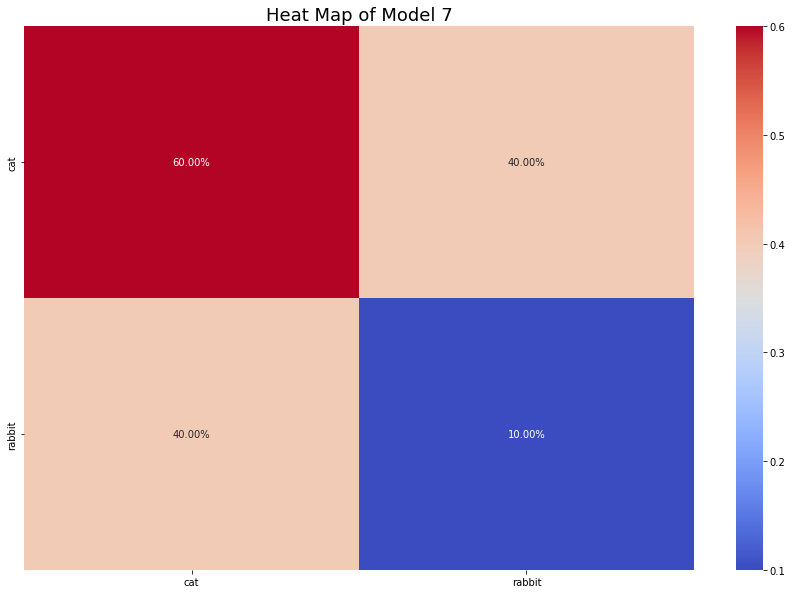

In [302]:
plt_con(model, test_set)

# Prediction on Custom img

In [277]:
def prediction(img_path,model, mode="categorical"):
    img = tf.io.read_file(img_path)
    img_default = tf.io.decode_image(img)
    img = tf.image.resize(img_default,size=[224,224])
    pred = model.predict(tf.expand_dims(img,axis=0))
    print(pred)
    plt.imshow(img_default)
    if mode  == 'categorical':
        plt.title(f'This is a {classes[pred.argmax()]}')
    else:
        plt.title(f'This is a {classes[int(tf.round(pred))]}')

1/1 [==============================] - 0s 91ms/step
[[0. 1.]]


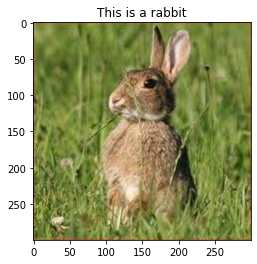

In [322]:
prediction('./rabbit-vs-kitty/val-cat-rabbit/rabbit/rabbit.100.jpg',model)

# Create a new model using effection net

In [155]:
effection_net = create_mode_base_on_hub_url('https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1')
effection_net.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=5)

Epoch 1/5


2022-07-15 14:06:02.562767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.1824 - accuracy: 0.9387

2022-07-15 14:06:16.301455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 28s 336ms/step - loss: 0.1824 - accuracy: 0.9387 - val_loss: 0.0462 - val_accuracy: 0.9879
Epoch 2/5
50/50 [==============================] - 13s 243ms/step - loss: 0.0287 - accuracy: 0.9969 - val_loss: 0.0246 - val_accuracy: 0.9976
Epoch 3/5
50/50 [==============================] - 11s 222ms/step - loss: 0.0192 - accuracy: 0.9981 - val_loss: 0.0192 - val_accuracy: 0.9976
Epoch 4/5
50/50 [==============================] - 11s 223ms/step - loss: 0.0140 - accuracy: 0.9994 - val_loss: 0.0160 - val_accuracy: 0.9976
Epoch 5/5
50/50 [==============================] - 12s 236ms/step - loss: 0.0120 - accuracy: 0.9994 - val_loss: 0.0130 - val_accuracy: 0.9976


In [156]:
effection_net.evaluate(test_set)

1/1 [==============================] - 2s 2s/step - loss: 0.0038 - accuracy: 1.0000


[0.0037542260251939297, 1.0]

1/1 [==============================] - 0s 139ms/step
[[0.]]


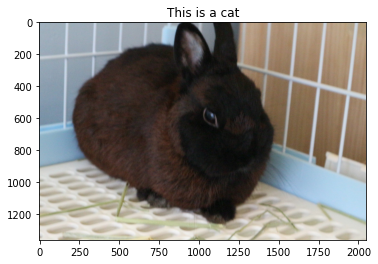

In [313]:
prediction('./fat1.jpeg',effection_net)

1/1 [==============================] - 1s 544ms/step
[[8 2]
 [2 3]]


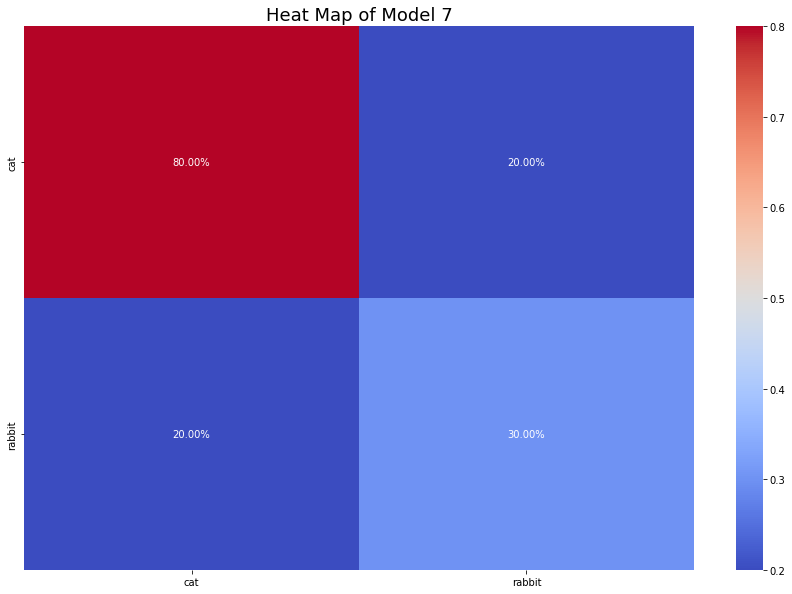

In [209]:
plt_con(effection_net, test_set,'binary')

# Create a muti-class model with mobile net

In [323]:
mobile_net = create_mode_base_on_hub_url('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4')

In [337]:
mobile_net.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=5)

Epoch 1/5
50/50 [==============================] - 24s 459ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0155 - val_accuracy: 0.9976
Epoch 2/5
32/50 [==================>...........] - ETA: 6s - loss: 0.0074 - accuracy: 1.0000

KeyboardInterrupt: 

In [327]:
mobile_net.evaluate(test_set)

1/1 [==============================] - 1s 597ms/step - loss: 0.0046 - accuracy: 1.0000


[0.004612846300005913, 1.0]

In [335]:
from sklearn.metrics import classification_report
y_pred = mobile_net.predict(test_set, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(test_set.labels, y_pred_bool))

1/1 [==============================] - 1s 558ms/step
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



1/1 [==============================] - 0s 319ms/step
[[0.80733955 0.1926605 ]]


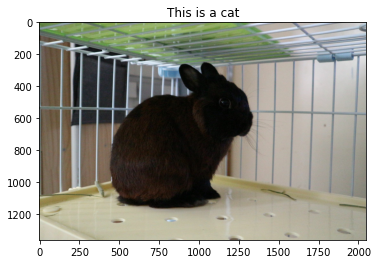

In [334]:
prediction('./fat4.jpeg',mobile_net)

# Create a binary model with efficent net

In [173]:
effection_net = create_mode_base_on_hub_url('https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1',mode='binary')
effection_net.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=5)

Epoch 1/5


2022-07-15 14:23:46.355381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9650

2022-07-15 14:24:03.538478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 32s 429ms/step - loss: 0.2234 - accuracy: 0.9650 - val_loss: 0.0753 - val_accuracy: 0.9976
Epoch 2/5
50/50 [==============================] - 13s 240ms/step - loss: 0.0541 - accuracy: 0.9969 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 12s 238ms/step - loss: 0.0344 - accuracy: 0.9987 - val_loss: 0.0298 - val_accuracy: 0.9952
Epoch 4/5
50/50 [==============================] - 11s 217ms/step - loss: 0.0241 - accuracy: 0.9981 - val_loss: 0.0224 - val_accuracy: 0.9976
Epoch 5/5
50/50 [==============================] - 11s 216ms/step - loss: 0.0195 - accuracy: 0.9981 - val_loss: 0.0205 - val_accuracy: 0.9976


In [177]:
effection_net.evaluate(test_set)

1/1 [==============================] - 1s 653ms/step - loss: 0.0085 - accuracy: 1.0000


[0.008520492352545261, 1.0]

1/1 [==============================] - 0s 53ms/step
[[0.]]


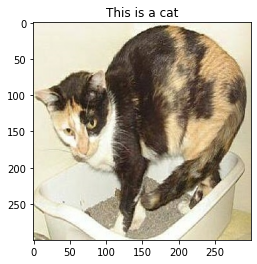

In [190]:
prediction('./rabbit-vs-kitty/test-images/cat/cat.238.jpg',effection_net)

# Create a custom CNN model

In [339]:
model_01 = Sequential([
    Conv2D(10,3,input_shape=IMG_SHAPE+(3,), activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_01.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model_01.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=20)

Epoch 1/20


2022-07-15 18:30:24.651973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5450

2022-07-15 18:30:34.523435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 13s 224ms/step - loss: 0.6939 - accuracy: 0.5450 - val_loss: 0.6726 - val_accuracy: 0.6884
Epoch 2/20
50/50 [==============================] - 10s 203ms/step - loss: 0.6078 - accuracy: 0.6731 - val_loss: 0.5033 - val_accuracy: 0.7633
Epoch 3/20
50/50 [==============================] - 10s 198ms/step - loss: 0.4980 - accuracy: 0.7425 - val_loss: 0.4769 - val_accuracy: 0.7947
Epoch 4/20
50/50 [==============================] - 10s 198ms/step - loss: 0.4515 - accuracy: 0.7794 - val_loss: 0.4393 - val_accuracy: 0.7971
Epoch 5/20
50/50 [==============================] - 10s 198ms/step - loss: 0.3988 - accuracy: 0.8081 - val_loss: 0.4012 - val_accuracy: 0.8237
Epoch 6/20
50/50 [==============================] - 10s 198ms/step - loss: 0.4109 - accuracy: 0.7937 - val_loss: 0.4025 - val_accuracy: 0.8309
Epoch 7/20
50/50 [==============================] - 10s 198ms/step - loss: 0.3628 - accuracy: 0.8394 - val_loss: 0.4671 - val_accuracy: 0.7826
Epoch 8/20

<AxesSubplot:>

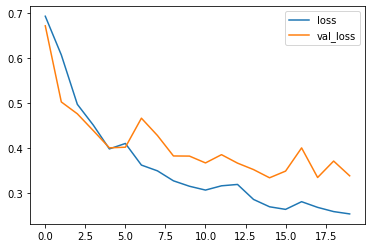

<Figure size 432x288 with 0 Axes>

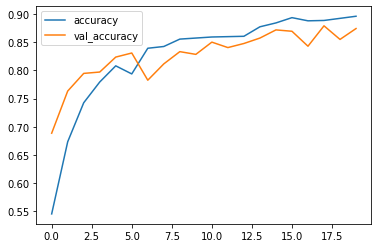

In [340]:
pd.DataFrame(model_01.history.history,columns=['loss','val_loss']).plot()
plt.figure()
pd.DataFrame(model_01.history.history,columns=['accuracy','val_accuracy']).plot()

In [341]:
model_01.evaluate(test_set)

1/1 [==============================] - 0s 446ms/step - loss: 0.2021 - accuracy: 0.9333


[0.20210625231266022, 0.9333333969116211]

2022-07-15 18:33:48.338278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 302ms/step
[[6 4]
 [5 0]]


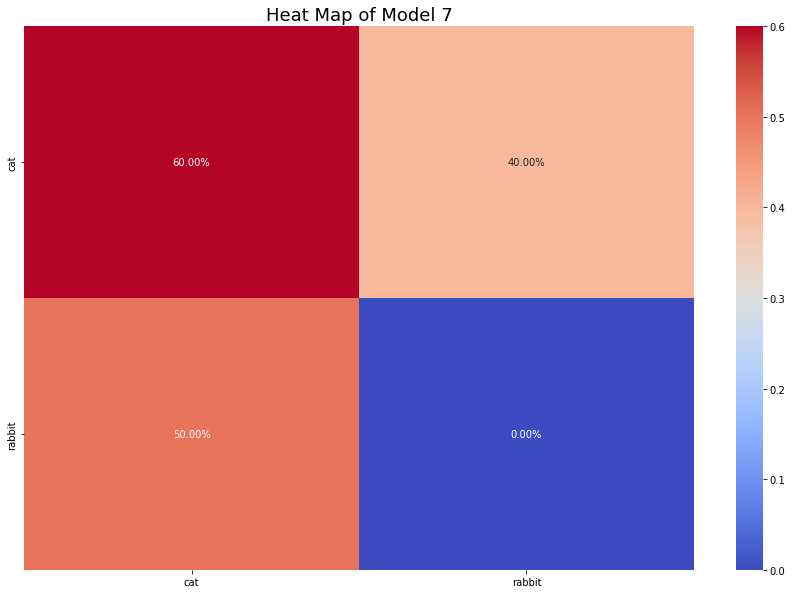

In [342]:
plt_con(model_01, test_set,'binary')

In [343]:
model_01.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_47 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 52, 52, 10)      

# New Model 2 for custom CNN

In [219]:
model_02 = Sequential([
    Conv2D(10,3,input_shape=IMG_SHAPE+(3,), activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(120,activation='relu'),
    Dense(60,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_02.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model_02.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=20)

Epoch 1/20


2022-07-15 16:56:30.436601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5050

2022-07-15 16:56:39.940174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 12s 222ms/step - loss: 0.6920 - accuracy: 0.5050 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 11s 208ms/step - loss: 0.6824 - accuracy: 0.5850 - val_loss: 0.6319 - val_accuracy: 0.6691
Epoch 3/20
50/50 [==============================] - 10s 207ms/step - loss: 0.6125 - accuracy: 0.6600 - val_loss: 0.5693 - val_accuracy: 0.7029
Epoch 4/20
50/50 [==============================] - 11s 209ms/step - loss: 0.5667 - accuracy: 0.6969 - val_loss: 0.5634 - val_accuracy: 0.7101
Epoch 5/20
50/50 [==============================] - 10s 204ms/step - loss: 0.5645 - accuracy: 0.6969 - val_loss: 0.5472 - val_accuracy: 0.6981
Epoch 6/20
50/50 [==============================] - 10s 206ms/step - loss: 0.5053 - accuracy: 0.7469 - val_loss: 0.5062 - val_accuracy: 0.7415
Epoch 7/20
50/50 [==============================] - 10s 207ms/step - loss: 0.4451 - accuracy: 0.7713 - val_loss: 0.4685 - val_accuracy: 0.7754
Epoch 8/20

In [252]:
model_02.fit(train_set,validation_data=validaton_set,steps_per_epoch=len(train_set), validation_steps=len(validaton_set),epochs=10)

Epoch 1/10
50/50 [==============================] - 11s 211ms/step - loss: 0.2821 - accuracy: 0.8831 - val_loss: 0.3983 - val_accuracy: 0.8261
Epoch 2/10
50/50 [==============================] - 10s 208ms/step - loss: 0.2785 - accuracy: 0.8831 - val_loss: 0.4739 - val_accuracy: 0.8237
Epoch 3/10
50/50 [==============================] - 10s 202ms/step - loss: 0.2697 - accuracy: 0.8881 - val_loss: 0.4862 - val_accuracy: 0.8261
Epoch 4/10
50/50 [==============================] - 10s 198ms/step - loss: 0.2611 - accuracy: 0.8856 - val_loss: 0.4377 - val_accuracy: 0.8213
Epoch 5/10
50/50 [==============================] - 10s 198ms/step - loss: 0.2496 - accuracy: 0.8950 - val_loss: 0.4886 - val_accuracy: 0.8164
Epoch 6/10
50/50 [==============================] - 10s 199ms/step - loss: 0.2409 - accuracy: 0.8975 - val_loss: 0.5459 - val_accuracy: 0.7826
Epoch 7/10
50/50 [==============================] - 10s 194ms/step - loss: 0.2422 - accuracy: 0.9000 - val_loss: 0.4136 - val_accuracy: 0.8309

<AxesSubplot:>

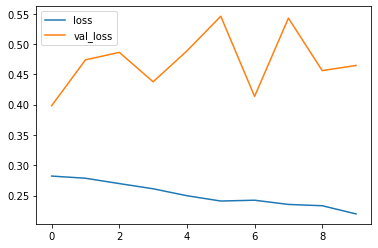

<Figure size 432x288 with 0 Axes>

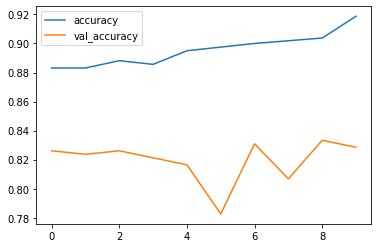

In [253]:
pd.DataFrame(model_02.history.history,columns=['loss','val_loss']).plot()
plt.figure()
pd.DataFrame(model_02.history.history,columns=['accuracy','val_accuracy']).plot()

In [ ]:
model_01.evaluate(test_set)

1/1 [==============================] - 0s 34ms/step
[[9 1]
 [3 2]]


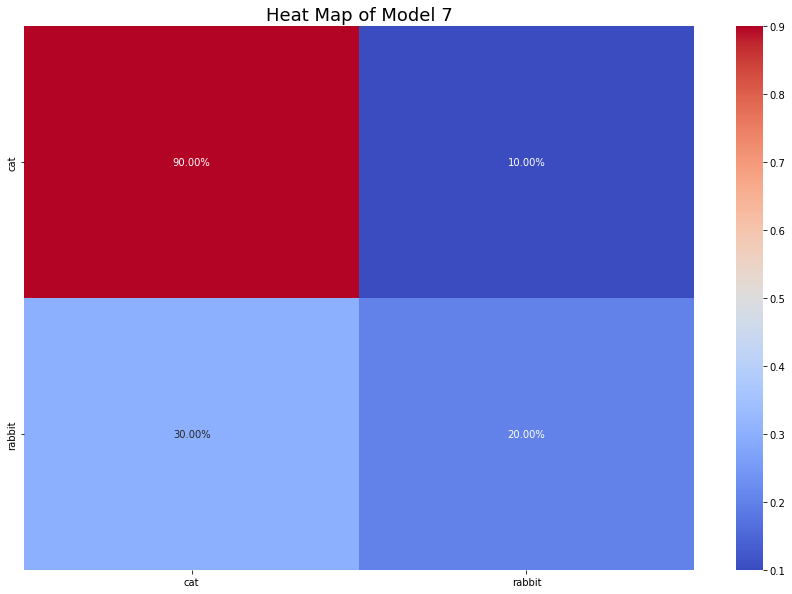

In [256]:
plt_con(model_02, test_set,'binary')

1/1 [==============================] - 0s 119ms/step
[[1.]]


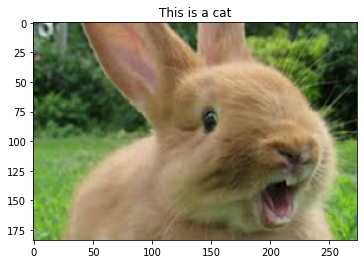

In [261]:
prediction('./rabbit-vs-kitty/test-images/rabbit/images-2.jpeg',model_01)

In [1]:
import tensorflow as tf
import keras

<module 'keras.losses' from '/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/losses.py'>